In [13]:
import matplotlib.pyplot as plt
import numpy as np

from bandit import Bandits_one
from mab import EpsilonGreedy

# Part 2 - Report

### Exercise 8

In [14]:
env = Bandits_one()

experiments = 20
episodes = 1000

mean_cumulative_regret = {
    "epsilon-greedy": [0] * episodes,
    "decaying epsilon-greedy": [0] * episodes,
    "ucb": [0] * episodes,
}

First we run the Epsilon-greedy MAB algorithm on the environment for 1000 episodes, 20 times.

In [15]:
# Epsilon-greedy model
for _ in range(experiments):
    agent = EpsilonGreedy()
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

Then we run decaying Epsilon-greedy model the same number of times.

In [16]:
# Decaying epsilon-greedy model
for _ in range(experiments):
    agent = EpsilonGreedy(alpha=0.99)
    observation, reward, terminated, truncated, info = env.reset()

    cumulative_reward = 0
    for episode in range(1, episodes+1):
        action = agent.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        agent.update(action, reward)

        cumulative_reward += reward
        mean_cumulative_regret["decaying epsilon-greedy"][episode-1] += (episode * env.means[env.get_optimal_action()] - cumulative_reward) / experiments

        if terminated or truncated:
            observation, reward, terminated, truncated, info = env.reset()

Plot the different models' cumulative regret.

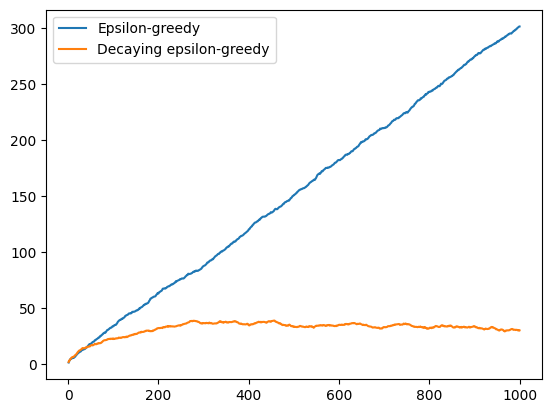

In [17]:
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["epsilon-greedy"], label="Epsilon-greedy")
plt.plot(np.arange(1, episodes+1), mean_cumulative_regret["decaying epsilon-greedy"], label="Decaying epsilon-greedy")
plt.legend()
plt.show()

In [18]:
mean_cumulative_regret["decaying epsilon-greedy"]

[2.033265959856937,
 3.280972130787482,
 3.389121987053608,
 4.005538327543638,
 4.537833958499518,
 5.081622169796763,
 5.691993368028713,
 6.0700357428856435,
 6.193048605847545,
 6.567538551843205,
 6.510577714221669,
 6.615148822886783,
 6.876233760130867,
 7.5297270282196145,
 7.9432647997406685,
 8.19521851488472,
 8.572137437368582,
 8.983775510488204,
 9.511058427451676,
 10.210324571598008,
 10.715572917950698,
 11.168955480763103,
 11.536095514460426,
 12.102126273564442,
 12.30954364438977,
 12.619681469589636,
 12.630029888894986,
 13.073081963705945,
 13.270286800138914,
 13.725132348272396,
 14.157173526941397,
 14.450408067986128,
 14.244565190647881,
 14.343524126134378,
 14.283886295640006,
 14.249976635026536,
 14.40421458583564,
 14.672978601911549,
 15.056220732678739,
 14.878271126212027,
 15.039188089151803,
 15.460982799134198,
 15.615366815477438,
 15.531957311471817,
 15.742474888752408,
 15.802342880905835,
 16.010809303876748,
 15.90797552567163,
 16.35675051